In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# parameters
nx = 50
ny = 50
nt = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax-xmin) / (nx-1)
dy = (ymax-ymin) / (ny-1)

# initialization
p  = numpy.zeros((ny,nx))
pd = numpy.zeros((ny,nx))
b  = numpy.zeros((ny,nx))
x = numpy.linspace(xmin,xmax,nx)
y = numpy.linspace(ymin,ymax,ny)

# source
b[int(ny/4), int(nx/4)] = 100
b[int(3*ny/4), int(3*nx/4)] = -100

In [3]:
for it in range(nt):

    pd = p.copy()
    
    p[1:-1,1:-1] = (((pd[1:-1,2:] + pd[1:-1,:-2]) * dy**2 +
                     (pd[2:,1:-1] + pd[:-2,1:-1]) * dx**2 -
                     b[1:-1,1:-1] * dx**2 * dy**2) /
                    (2 * (dx**2 + dy**2)))
    
    p[:,0]    = 0
    p[:,nx-1] = 0
    p[0,:]    = 0
    p[ny-1,:] = 0

In [4]:
def plot2D(x,y,p):
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
                           linewidth=0, antialiased=False)
    ax.view_init(30,225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

C:\Users\hkimu\AppData\Local\Temp/ipykernel_18000/678843169.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


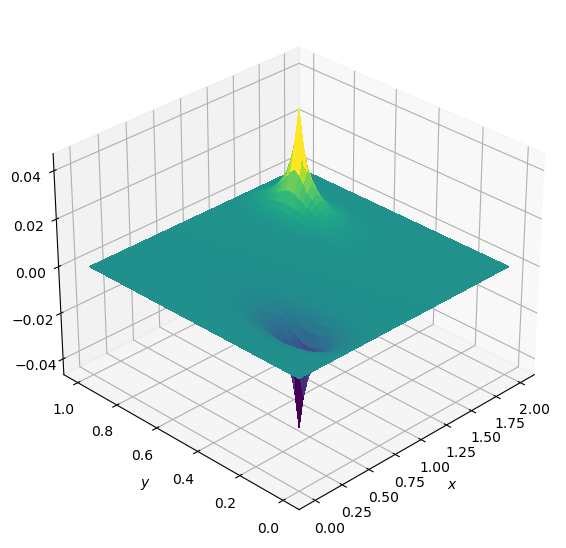

In [5]:
plot2D(x,y,p)